In [1]:
%reload_ext tikzmagic

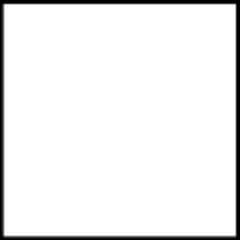

In [2]:
%tikz \draw (0,0) rectangle (1,1);

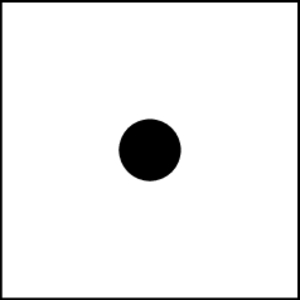

In [3]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

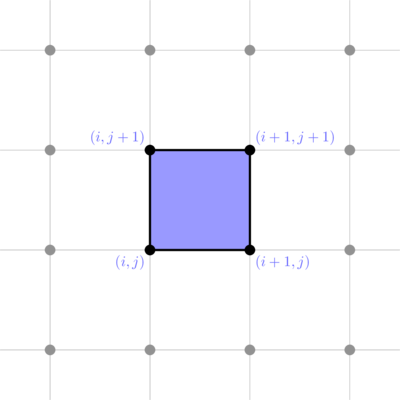

In [4]:
%%tikz -s 400,400 -sc 1.2 -f png
[>=latex']
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);

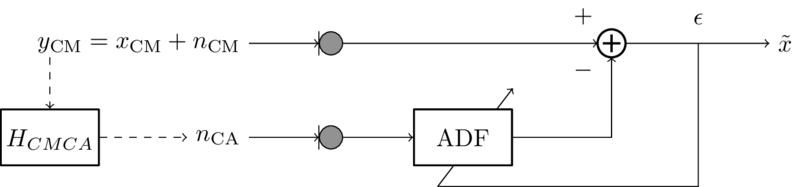

In [7]:
%%tikz -l positioning,dsp -s 800,400
\node[](des_sig) {$y_\text{CM} = x_\text{CM}+n_\text{CM}$};
\node[circle,draw,right = of des_sig,fill=gray] (Y1) {};
\node[circle,draw,below = of Y1,fill=gray] (Y2) {};
\draw [-] let \p0 = (Y1.north), \p1 = (Y1.south), \p2 = (Y1.west) in (\x2,\y0) -- (\x2,\y1);
\draw [-] let \p0 = (Y2.north), \p1 = (Y2.south), \p2 = (Y2.west) in (\x2,\y0) -- (\x2,\y1);
\path let \p1 = (des_sig.west), \p2 = (Y2.west) in node[dspfilter] (HCMCA)  at (\x1+3mm,\y2) {$H_{CMCA}$};
\draw [->,dashed] let \p0 = (des_sig.west), \p1 = (HCMCA.north) in (\x0+3mm,\y0-2mm) -- (\x1,\y1);
\node[right = of HCMCA,xshift=.7em] (n) {$n_{\text{CA}}$};
\draw [->,dashed] (HCMCA.east) -- (n.west);
\draw [->] (n.east) -- (Y2.west);
\node[dspfilter,right = of Y2] (ADF) {ADF};
\node[dspadder,right = of Y1,label={above left:$+$},label={below left:$-$},xshift=7.5em] (sum2) {};
\draw [->] (Y1.east) -- (sum2.west);
\draw [->] (Y2.east) -- (ADF.west);
\node[right = of sum2,xshift=3em](filt_sig) {$\tilde{x}$};
\draw [->] (ADF.east) -| (sum2.south);
\draw [->] (sum2.east) -- (filt_sig.west);
\draw [->] (des_sig.east) -- (Y1.west);
\node[right=of sum2] (afupd1) {};
\draw[-] let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$), \p2=(ADF.west) in (\x1,\y0) |- (\x2+1em,\y2-2em);
\path let \p0 = (filt_sig), \p1=($(sum2)!0.5!(filt_sig)$)in node[] (error)  at (\x1,\y0+1em) {$\epsilon$};
\draw[->] let \p1=(ADF.west), \p2=(ADF.east) in (\x1+1em,\y1-2em) -- (\x2,\y2+2em);
\node[dspfilter,right = of Y2,fill=white] (ADF) {ADF};

In [49]:
print('blah')

blah
